In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
df = pd.read_excel('train.xlsx')

In [71]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# data cleaning

In [72]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Remove not needed columns

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


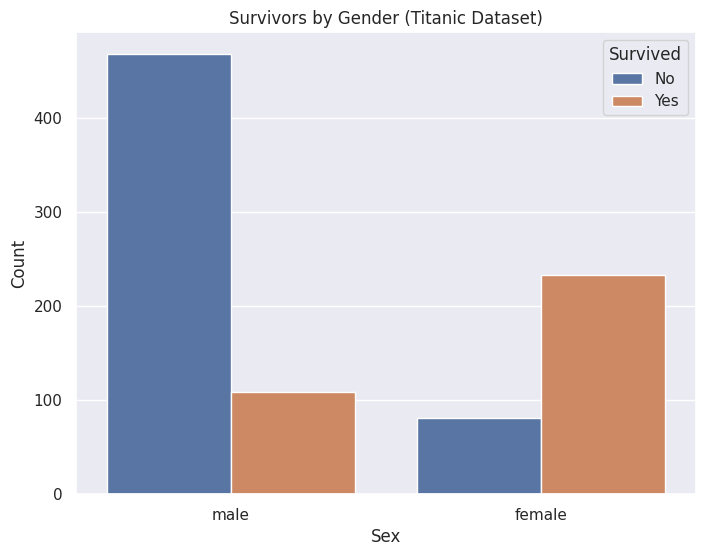

In [74]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", hue="Survived", data=df)

# Customize the plot
plt.title("Survivors by Gender (Titanic Dataset)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.show()


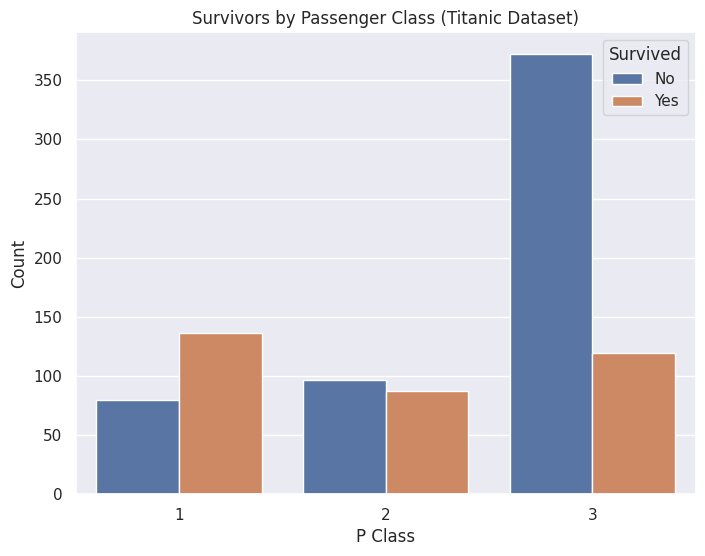

In [76]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="Pclass", hue="Survived", data=df)

# Customize the plot
plt.title("Survivors by Passenger Class (Titanic Dataset)")
plt.xlabel("P Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.show()


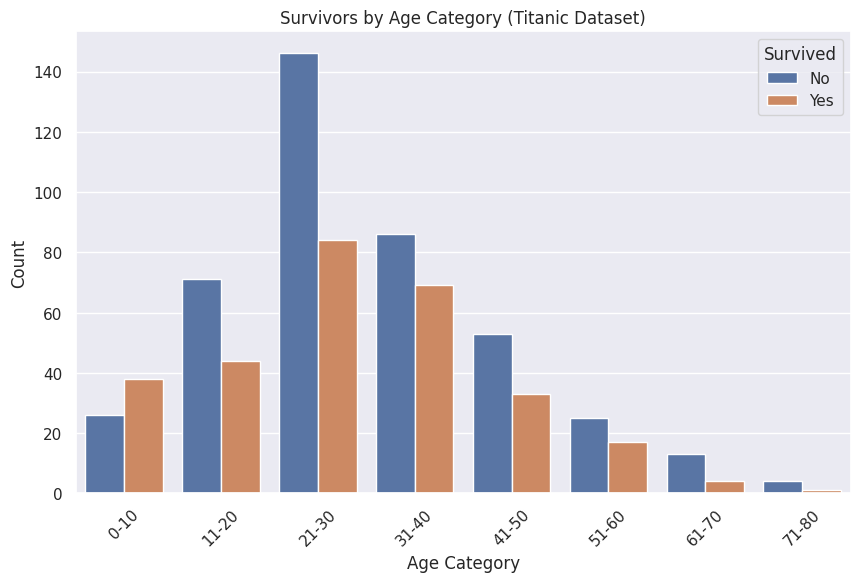

In [78]:
# Define age categories
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AgeCategory' based on the defined bins and labels
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="AgeCategory", hue="Survived", data=df, order=age_labels)

# Customize the plot
plt.title("Survivors by Age Category (Titanic Dataset)")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.xticks(rotation=45)
plt.show()


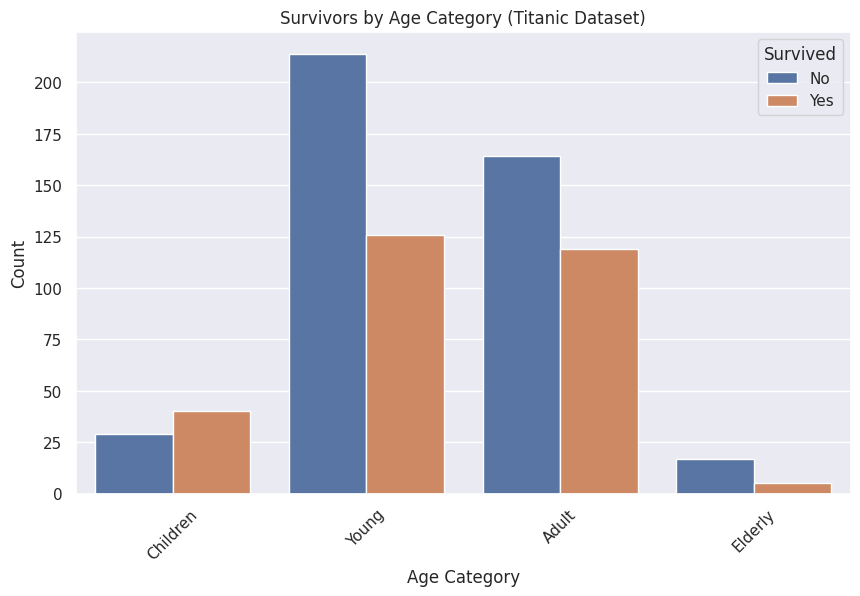

In [80]:
age_bins = [0, 12, 30, 60, 100]
age_labels = ['Children', 'Young', 'Adult', 'Elderly']

# Create a new column 'AgeCategory' based on the defined bins and labels
df['AgeCategory'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="AgeCategory", hue="Survived", data=df, order=age_labels)

# Customize the plot
plt.title("Survivors by Age Category (Titanic Dataset)")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.xticks(rotation=45)
plt.show()

we remove columns that won't be used, one-hot-encode the "Sex" and "Pclass" columns, and remove rows with missing values.

In [60]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()


,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


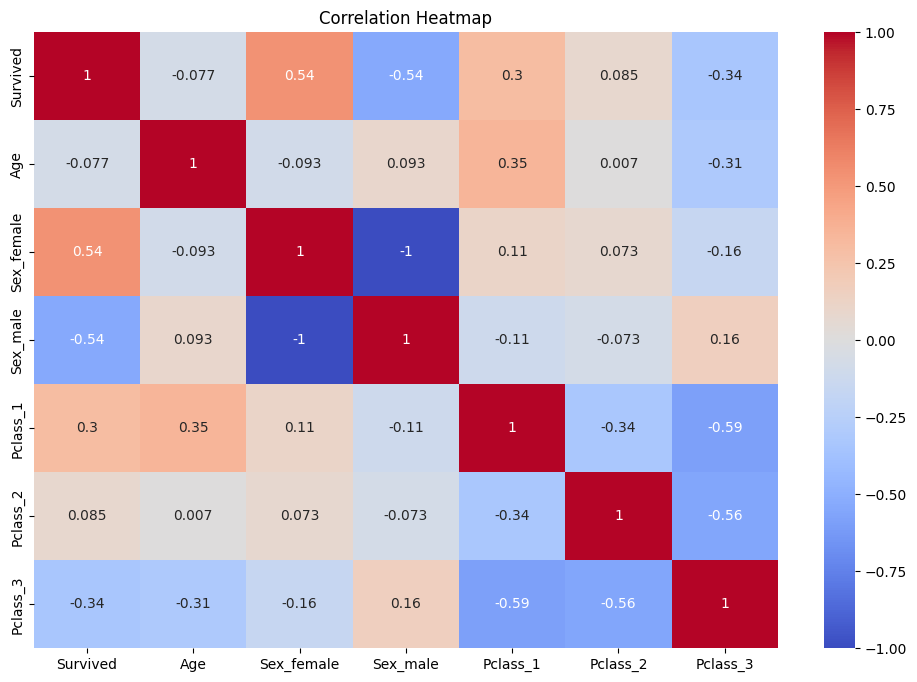

In [61]:
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [62]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

model.score(x_test, y_test)


0.8321678321678322

In [63]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()


0.7857480547621394

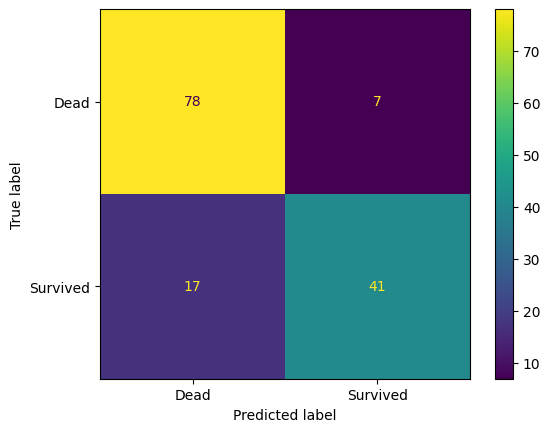

In [64]:
%matplotlib inline

from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)


from sklearn.metrics import ConfusionMatrixDisplay


cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['Dead', 'Survived'])

cm_display.plot()
plt.show()


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        85
           1       0.85      0.71      0.77        58

    accuracy                           0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143



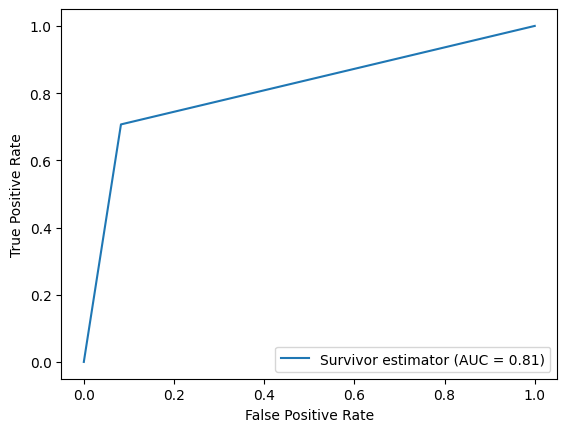

In [66]:
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Survivor estimator')
display.plot()
